## Modelling

In [1]:
# imports:

#maths
import pandas as pd
import numpy as np
import scipy.stats as stats

#visual
import seaborn as sns
import matplotlib.pyplot as plt

#modelling
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.pipeline import make_pipeline, Pipeline

from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from IPython.display import SVG
#from xgboost import XGBRegressor


#from xgboost import xgboost
#from xgboost import plot_importance

%matplotlib inline

#To visualize the whole grid
pd.options.display.max_columns = 999

plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
airbnb_df = pd.read_csv('../data/listings_cleaned.csv')

In [3]:
airbnb_df = airbnb_df.drop(columns = ['amenities',
                                      'host_since', 
                                      'host_verifications', 
                                      'street',
                                      'calendar_updated'])

In [4]:
airbnb_df_dum = pd.get_dummies(airbnb_df)

In [5]:
airbnb_df_dum

,id,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_30,availability_60,availability_90,availability_365,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,neighbourhood_cleansed_Ang Mo Kio,neighbourhood_cleansed_Bedok,neighbourhood_cleansed_Bishan,neighbourhood_cleansed_Bukit Batok,neighbourhood_cleansed_Bukit Merah,neighbourhood_cleansed_Bukit Panjang,neighbourhood_cleansed_Bukit Timah,neighbourhood_cleansed_Central Water Catchment,neighbourhood_cleansed_Choa Chu Kang,neighbourhood_cleansed_Clementi,neighbourhood_cleansed_Downtown Core,neighbourhood_cleansed_Geylang,neighbourhood_cleansed_Hougang,neighbourhood_cleansed_Jurong East,neighbourhood_cleansed_Jurong West,neighbourhood_cleansed_Kallang,neighbourhood_cleansed_Lim Chu Kang,neighbourhood_cleansed_Mandai,neighbourhood_cleansed_Marina South,neighbourhood_cleansed_Marine Parade,neighbourhood_cleansed_Museum,neighbourhood_cleansed_Newton,neighbourhood_cleansed_Novena,neighbourhood_cleansed_Orchard,neighbourhood_cleansed_Outram,neighbourhood_cleansed_Pasir Ris,neighbourhood_cleansed_Pioneer,neighbourhood_cleansed_Punggol,neighbourhood_cleansed_Queenstown,neighbourhood_cleansed_River Valley,neighbourhood_cleansed_Rochor,neighbourhood_cleansed_Sembawang,neighbourhood_cleansed_Sengkang,neighbourhood_cleansed_Serangoon,neighbourhood_cleansed_Singapore River,neighbourhood_cleansed_Southern Islands,neighbourhood_cleansed_Sungei Kadut,neighbourhood_cleansed_Tampines,neighbourhood_cleansed_Tanglin,neighbourhood_cleansed_Toa Payoh,neighbourhood_cleansed_Tuas,neighbourhood_cleansed_Western Water Catchment,neighbourhood_cleansed_Woodlands,neighbourhood_cleansed_Yishun,neighbourhood_group_cleansed_Central Region,neighbourhood_group_cleansed_East Region,neighbourhood_group_cleansed_North Region,neighbourhood_group_cleansed_North-East Region,neighbourhood_group_cleansed_West Region,"smart_location_ Farrer Park, Singapore","smart_location_#04-354, Singapore","smart_location_*, Singapore","smart_location_67 Sophia road, Singapore","smart_location_Bedok, Singapore","smart_location_Bukit Timah, Singapore","smart_location_Changi, Singapore","smart_location_City, Singapore","smart_location_Farrer Park, Singapore","smart_location_Geylang East, Singapore","smart_location_Geylang, Singapore","smart_location_Holland Village, Singapore","smart_location_Jurong, Singapore","smart_location_Kallang , Singapore","smart_location_Lavender, Singapore","smart_location_Little India, Singapore","smart_location_Mountbatten, Singapore","smart_location_Novena , Singapore","smart_location_Novena, Singapore","smart_location_Opera Estate, Singapore","smart_location_Pasir Panjang Hill, Singapore","smart_location_Pasir Ris Grove, Singapore","smart_location_Punggol, Singapore","smart_location_SG, Singapore","smart_location_SINGAPORE, Singapore","smart_location_Sembawang, Singapore","smart_location_Sengkang, Singapore","smart_location_Serangoon, Singapore",smart_location_Singapore,"smart_location_Singapore , Singapore","smart_location_Singapore, SG, Singapore","smart_location_Singapour, Singapore","smart_location_Singapura, Singapore","smart_location_Singpapore , Singapore","smart_location_Tampines, Singapore","smart_location_Tanjong Pagar, Singapore","smart_location_The Shore Residences, Singapore","smart_location_Whampoa, Singapore","smart_location_Woodlands , Singapore","smart_location_Woodlands, Singapore","smart_location_bedok, Singapore","smart_location_n/a, Singapore","smart_location_singapore, Singapore","smart_location_兀兰, Singapore","smart_location_实龙岗, Singapore","smart_location_新加坡, Singapore","smart_location_武吉巴督, Singapore","smart_location_淡滨尼, Singapore",property_type_Aparthotel,property_type_Apartment,property_type_Bed and breakf

In [6]:
# Separating X and y
X = airbnb_df_dum.drop('price', axis=1)
y = airbnb_df_dum.price

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [7]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

NameError: name 'xgb' is not defined

In [9]:
# Building the model
model = Sequential()

model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compiling the model
model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(model.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               20736     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 119,809
Trainable params: 119,809
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
history = model.fit(X_train,
                  y_train,
                  epochs=100,
                  batch_size=256,
                  validation_data=(X_test, y_test))


Train on 5571 samples, validate on 1857 samples
Epoch 1/100
5571/5571 [==============================] - 0s 54us/step - loss: 108978.2951 - mean_squared_error: 108978.3047 - val_loss: 183209.5977 - val_mean_squared_error: 183209.5781
Epoch 2/100
5571/5571 [==============================] - 0s 21us/step - loss: 82339.9716 - mean_squared_error: 82339.9766 - val_loss: 162353.8622 - val_mean_squared_error: 162353.8594
Epoch 3/100
5571/5571 [==============================] - 0s 21us/step - loss: 72759.6885 - mean_squared_error: 72759.6797 - val_loss: 158825.0333 - val_mean_squared_error: 158825.0312
Epoch 4/100
5571/5571 [==============================] - 0s 21us/step - loss: 68856.3913 - mean_squared_error: 68856.3984 - val_loss: 156409.5715 - val_mean_squared_error: 156409.5781
Epoch 5/100
5571/5571 [==============================] - 0s 27us/step - loss: 65203.7661 - mean_squared_error: 65203.7656 - val_loss: 155114.9046 - val_mean_squared_error: 155114.9062
Epoch 6/100
5571/5571 [======

Epoch 44/100
5571/5571 [==============================] - 0s 19us/step - loss: 12541.4299 - mean_squared_error: 12541.4307 - val_loss: 1842489.8963 - val_mean_squared_error: 1842489.8750
Epoch 45/100
5571/5571 [==============================] - 0s 21us/step - loss: 12479.5624 - mean_squared_error: 12479.5625 - val_loss: 1995896.6836 - val_mean_squared_error: 1995896.6250
Epoch 46/100
5571/5571 [==============================] - 0s 20us/step - loss: 11820.5418 - mean_squared_error: 11820.5420 - val_loss: 1941365.3419 - val_mean_squared_error: 1941365.3750
Epoch 47/100
5571/5571 [==============================] - 0s 19us/step - loss: 11608.5530 - mean_squared_error: 11608.5547 - val_loss: 2254979.7731 - val_mean_squared_error: 2254980.0000
Epoch 48/100
5571/5571 [==============================] - 0s 19us/step - loss: 11992.2228 - mean_squared_error: 11992.2227 - val_loss: 2173592.1488 - val_mean_squared_error: 2173592.2500
Epoch 49/100
5571/5571 [==============================] - 0s 19us

5571/5571 [==============================] - 0s 22us/step - loss: 2984.6540 - mean_squared_error: 2984.6543 - val_loss: 5384660.8251 - val_mean_squared_error: 5384660.5000
Epoch 89/100
5571/5571 [==============================] - 0s 21us/step - loss: 2897.1589 - mean_squared_error: 2897.1589 - val_loss: 5540680.6876 - val_mean_squared_error: 5540681.0000
Epoch 90/100
5571/5571 [==============================] - 0s 20us/step - loss: 3169.0922 - mean_squared_error: 3169.0920 - val_loss: 5333809.5349 - val_mean_squared_error: 5333810.0000
Epoch 91/100
5571/5571 [==============================] - 0s 20us/step - loss: 3152.0699 - mean_squared_error: 3152.0696 - val_loss: 5720850.9367 - val_mean_squared_error: 5720851.0000
Epoch 92/100
5571/5571 [==============================] - 0s 19us/step - loss: 3206.4680 - mean_squared_error: 3206.4680 - val_loss: 5302092.0435 - val_mean_squared_error: 5302092.0000
Epoch 93/100
5571/5571 [==============================] - 0s 20us/step - loss: 3691.7166

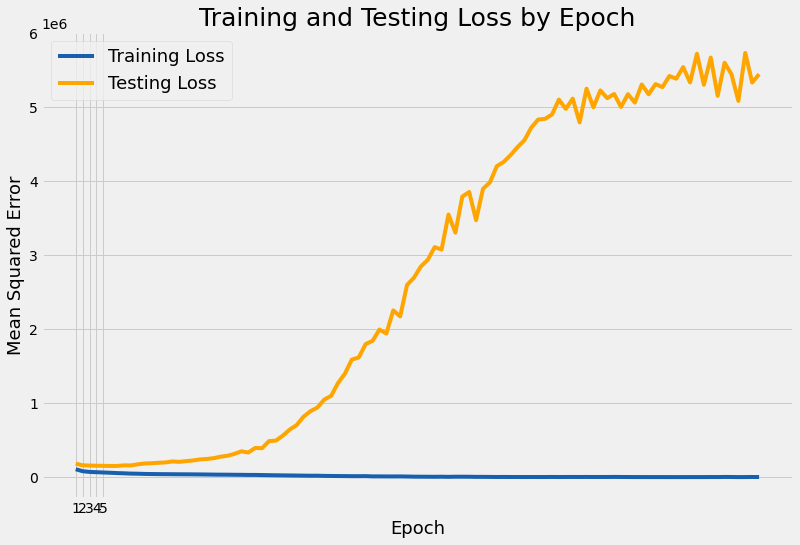

In [12]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')
# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Mean Squared Error', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4], [1, 2, 3, 4, 5])

plt.legend(fontsize = 18);